# Wind Stress Curl Over Weddell
ERA-1deg Datasets

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from glob import glob
import xarray as xr

In [2]:
xr.__version__

'0.10.7'

In [3]:
taux = 'taux-ERA.nc'

In [4]:
ds = xr.open_dataset(taux, decode_times=False).rename({'T':'time', 'X' : 'lon', 'Y' : 'lat'})
#ds['tauy'] = xr.open_dataset(tauy, decode_times=False).rename({'T':'time', 'X' : 'lon', 'Y' : 'lat'})['tauy']
ds['time'] = pd.date_range('1979-01-01',periods=ds.time.size,freq='MS')
ds
#chunks={'T': 100}

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 719)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
Data variables:
    taux     (time, lat, lon) float32 ...
Attributes:
    history:  Mon Sep  4 20:28:07 2017: ncatted -a calendar,T,o,c,360 taux-ER...

In [5]:
ds.taux.max()

<xarray.DataArray 'taux' ()>
array(2.51559)

In [6]:
for n in range(298, 305, 1):
    print(n, ds.taux[:n].max())

298 <xarray.DataArray 'taux' ()>
array(2.170468)
299 <xarray.DataArray 'taux' ()>
array(2.170468)
300 <xarray.DataArray 'taux' ()>
array(2.170468)
301 <xarray.DataArray 'taux' ()>
array(2.170468)
302 <xarray.DataArray 'taux' ()>
array(2.170468)
303 <xarray.DataArray 'taux' ()>
array(2.170468)
304 <xarray.DataArray 'taux' ()>
array(2.170468)


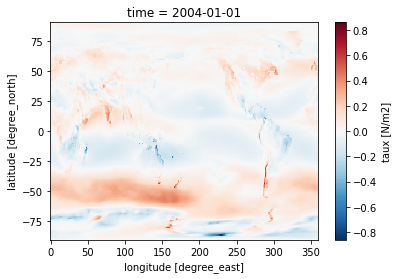

In [7]:
ds.taux[300].plot()

In [8]:
ds.taux.min()

<xarray.DataArray 'taux' ()>
array(-1.858946)

In [9]:
taux_masked = ds.taux.where(ds.taux!=0.0)

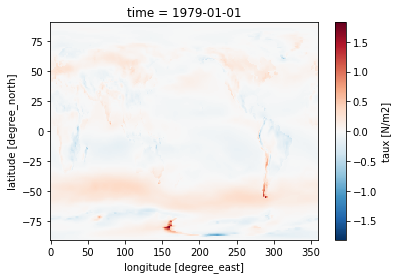

In [10]:
taux_masked[0].plot()

In [11]:
taux_masked.isnull().sum()

<xarray.DataArray 'taux' ()>
array(0)

In [12]:
(~taux_masked.isnull()).sum()

<xarray.DataArray 'taux' ()>
array(46850040)

In [13]:
ds.taux.min()

<xarray.DataArray 'taux' ()>
array(-1.858946)

In [14]:
ds.lon

<xarray.DataArray 'lon' (lon: 360)>
array([  0.,   1.,   2., ..., 357., 358., 359.], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
Attributes:
    modulus:     360.0
    pointwidth:  1.0
    long_name:   longitude
    gridtype:    1
    units:       degree_east

In [15]:
#Changing longitude coords from 0:360 to -180:180
ds1 = ds.taux.roll(lon=-181).copy()
ds2 = ds1.drop('lon')
lon = ds1.lon.data
lon[lon>180.] -= 360.
ds2.coords['lon'] = ('lon', lon)
ds2

<xarray.DataArray 'taux' (time: 719, lat: 181, lon: 360)>
array([[[-0.015669, -0.015669, ..., -0.015669, -0.015669],
        [ 0.008542,  0.008474, ...,  0.008611,  0.008542],
        ...,
        [-0.021961, -0.021482, ..., -0.022782, -0.02244 ],
        [-0.002401, -0.002401, ..., -0.002401, -0.002401]],

       [[-0.008693, -0.008693, ..., -0.008693, -0.008693],
        [-0.001033, -0.001238, ..., -0.000486, -0.000759],
        ...,
        [ 0.055597,  0.055119, ...,  0.056486,  0.056144],
        [ 0.005054,  0.005054, ...,  0.005054,  0.005054]],

       ...,

       [[-0.004075, -0.004075, ..., -0.004075, -0.004075],
        [-0.002407, -0.00254 , ..., -0.002273, -0.00234 ],
        ...,
        [-0.017292, -0.016758, ..., -0.018294, -0.017827],
        [-0.002473, -0.002473, ..., -0.002473, -0.002473]],

       [[-0.005944, -0.005944, ..., -0.005944, -0.005944],
        [-0.01529 , -0.015624, ..., -0.014689, -0.015023],
        ...,
        [-0.025169, -0.024502, ..., -0.026504

#### Calculating curl of taux

In [16]:
earth_circumference = 2*np.pi*6.371e6
meters_per_degree_lat = earth_circumference / 360
meters_per_degree_lat

111194.92664455873

In [17]:
delta_lat = ds2.lat.diff('lat')
delta_lat

<xarray.DataArray 'lat' (lat: 180)>
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 -82.0 ...

In [18]:
delta_y = delta_lat * meters_per_degree_lat
delta_y

<xarray.DataArray 'lat' (lat: 180)>
array([111194.93, 111194.93, 111194.93, 111194.93, 111194.93, 111194.93,
       111194.93, 111194.93, 111194.93, 111194.93, 111194.93, 111194.93,
       111194.93, 111194.93, 111194.93, 111194.93, 111194.93, 111194.93,
       111194.93, 111194.93, 111194.93, 111194.93, 111194.93, 111194.93,
       111194.93, 111194.93, 111194.93, 111194.93, 111194.93, 111194.93,
       111194.93, 111194.93, 111194.93, 111194.93, 111194.93, 111194.93,
       111194.93, 111194.93, 111194.93, 111194.93, 111194.93, 111194.93,
       111194.93, 111194.93, 111194.93, 111194.93, 111194.93, 111194.93,
       111194.93, 111194.93, 111194.93, 111194.93, 111194.93, 111194.93,
       111194.93, 111194.93, 111194.93, 111194.93, 111194.93, 111194.93,
       111194.93, 111194.93, 111194.93, 111194.93, 111194.93, 111194.93,
       111194.93, 111194.93, 111194.93, 111194.93, 111194.93, 111194.93,
       111194.93, 111194.93, 111194.93, 111194.93, 111194.93, 111194.93,
       111194.9

In [19]:
delta_taux = ds2.diff(dim='lat')
delta_taux

<xarray.DataArray 'taux' (time: 719, lat: 180, lon: 360)>
array([[[ 0.024211,  0.024143, ...,  0.02428 ,  0.024211],
        [-0.019903, -0.019834, ..., -0.020108, -0.019971],
        ...,
        [-0.003693, -0.003625, ..., -0.003625, -0.003762],
        [ 0.019561,  0.019082, ...,  0.020381,  0.020039]],

       [[ 0.00766 ,  0.007455, ...,  0.008207,  0.007934],
        [-0.0264  , -0.0264  , ..., -0.026605, -0.026537],
        ...,
        [ 0.002736,  0.002736, ...,  0.002736,  0.002873],
        [-0.050543, -0.050064, ..., -0.051432, -0.05109 ]],

       ...,

       [[ 0.001669,  0.001535, ...,  0.001802,  0.001736],
        [-0.061279, -0.061079, ..., -0.060879, -0.061346],
        ...,
        [ 0.00761 ,  0.00741 , ...,  0.007877,  0.007743],
        [ 0.014819,  0.014285, ...,  0.015821,  0.015353]],

       [[-0.009345, -0.009679, ..., -0.008745, -0.009078],
        [-0.066486, -0.066486, ..., -0.065819, -0.066486],
        ...,
        [-0.008544, -0.008745, ..., -0.008144

In [20]:
curl_taux = delta_taux / delta_y
curl_taux

<xarray.DataArray (time: 719, lat: 180, lon: 360)>
array([[[ 2.177382e-07,  2.171230e-07, ...,  2.183533e-07,  2.177382e-07],
        [-1.789881e-07, -1.783729e-07, ..., -1.808336e-07, -1.796033e-07],
        ...,
        [-3.321427e-08, -3.259912e-08, ..., -3.259910e-08, -3.382905e-08],
        [ 1.759126e-07,  1.716072e-07, ...,  1.832935e-07,  1.802181e-07]],

       [[ 6.888887e-08,  6.704374e-08, ...,  7.380947e-08,  7.134917e-08],
        [-2.374206e-07, -2.374206e-07, ..., -2.392657e-07, -2.386505e-07],
        ...,
        [ 2.460301e-08,  2.460321e-08, ...,  2.460321e-08,  2.583335e-08],
        [-4.545438e-07, -4.502383e-07, ..., -4.625399e-07, -4.594646e-07]],

       ...,

       [[ 1.500824e-08,  1.380752e-08, ...,  1.620897e-08,  1.560861e-08],
        [-5.510990e-07, -5.492979e-07, ..., -5.474971e-07, -5.516994e-07],
        ...,
        [ 6.843724e-08,  6.663615e-08, ...,  7.083842e-08,  6.963769e-08],
        [ 1.332723e-07,  1.284697e-07, ...,  1.422772e-07,  1.380749

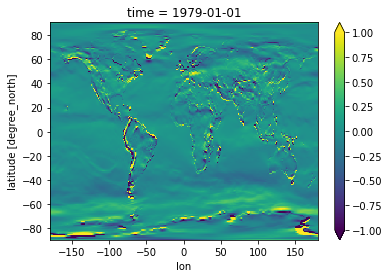

In [21]:
(curl_taux[0]*1e6).plot(vmin=-1,vmax=1)

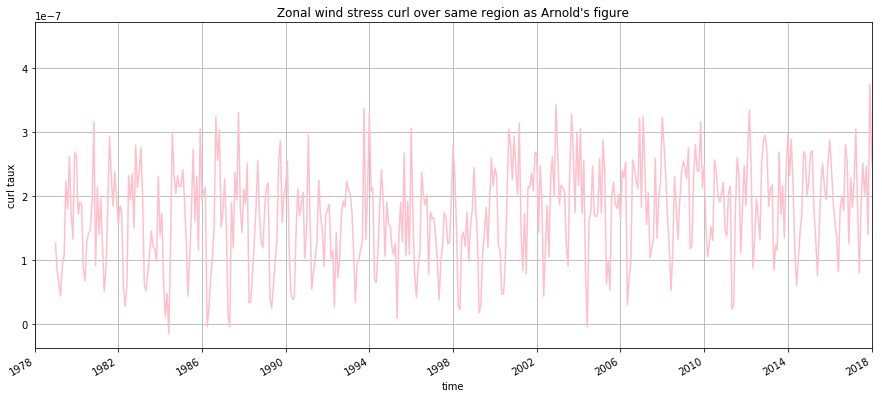

In [22]:
curl_taux.sel(lat=slice(-70,-60), lon=slice(-30, 30)).mean(['lat','lon']).plot(figsize=(15,6), color='pink')
plt.grid()
#plt.axhline(y=0, color='k')
plt.xlim('1978-01-01', '2018-01-01')
plt.ylabel('curl taux')
#plt.ylim(ymin=-0.15,ymax=0.20)
plt.title("Zonal wind stress curl over same region as Arnold's figure");

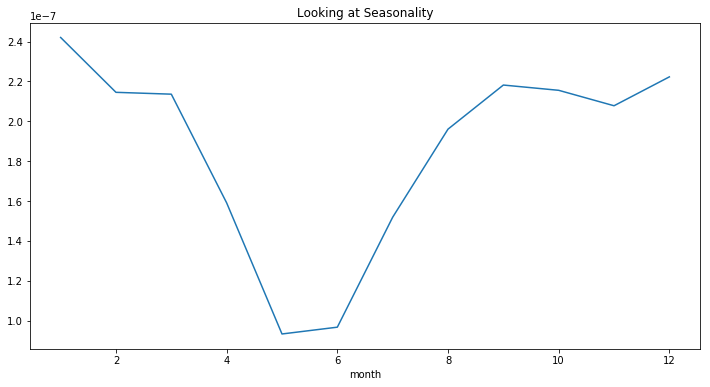

In [51]:
(curl_taux.groupby('time.month').mean(dim='time')).sel(lat=slice(-70,-60), lon=slice(-30, 30)).mean(['lat','lon']).plot(figsize=(12,6))
plt.title('Looking at Seasonality');

### Taking Seasonal Cycle out

In [52]:
curl_taux_season_out = curl_taux.groupby('time.month') - curl_taux.groupby('time.month').mean(dim='time')
curl_taux_season_out

<xarray.DataArray (time: 719, lat: 180, lon: 360)>
array([[[ 1.921327e-07,  1.942335e-07, ...,  1.865632e-07,  1.894769e-07],
        [ 2.922120e-07,  2.928884e-07, ...,  2.881936e-07,  2.914752e-07],
        ...,
        [-1.697468e-08, -1.602543e-08, ..., -1.632706e-08, -1.776203e-08],
        [ 1.763452e-07,  1.717887e-07, ...,  1.839572e-07,  1.808704e-07]],

       [[ 8.486647e-08,  8.564564e-08, ...,  8.362552e-08,  8.466323e-08],
        [ 2.431946e-07,  2.430073e-07, ...,  2.397568e-07,  2.422027e-07],
        ...,
        [ 3.942098e-08,  3.936067e-08, ...,  3.993323e-08,  4.081409e-08],
        [-4.190460e-07, -4.139998e-07, ..., -4.288316e-07, -4.247378e-07]],

       ...,

       [[-4.322477e-08, -4.327551e-08, ..., -4.484088e-08, -4.366258e-08],
        [-1.131201e-07, -1.121656e-07, ..., -1.101581e-07, -1.129442e-07],
        ...,
        [ 7.420903e-08,  7.265611e-08, ...,  7.596479e-08,  7.526187e-08],
        [ 1.315302e-07,  1.289560e-07, ...,  1.359977e-07,  1.340034

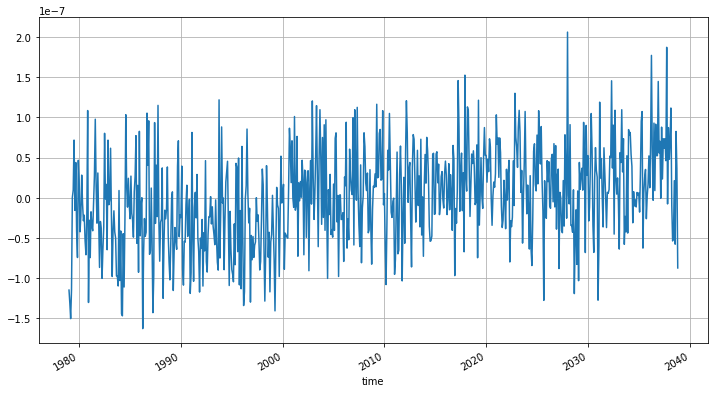

In [53]:
curl_taux_season_out.sel(lat=slice(-70,-60), lon=slice(-30, 30)).mean(['lat','lon']).plot(figsize=(12,6))
plt.grid();

### Calculating Wind Stress Anomaly

#### 1) Calculating rolling mean without seasonal effect

In [56]:
curl_taux_roll_mean = curl_taux_season_out.rolling(time=12, center=True).mean(dims='time')
curl_taux_roll_mean

<xarray.DataArray (time: 719, lat: 180, lon: 360)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 -82.0 ...
  * lon      (lon) float32 -179.0 -178.0 -177.0 -176.0 -175.0 -174.0 -173.0 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12 1 2 

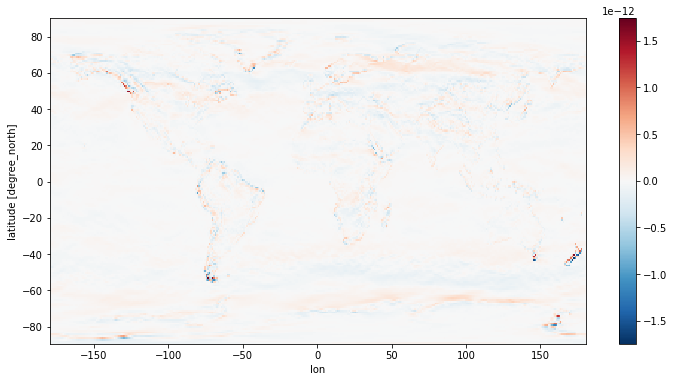

In [57]:
(curl_taux_roll_mean.mean(dim='time')/1e4).plot(figsize=(12,6))

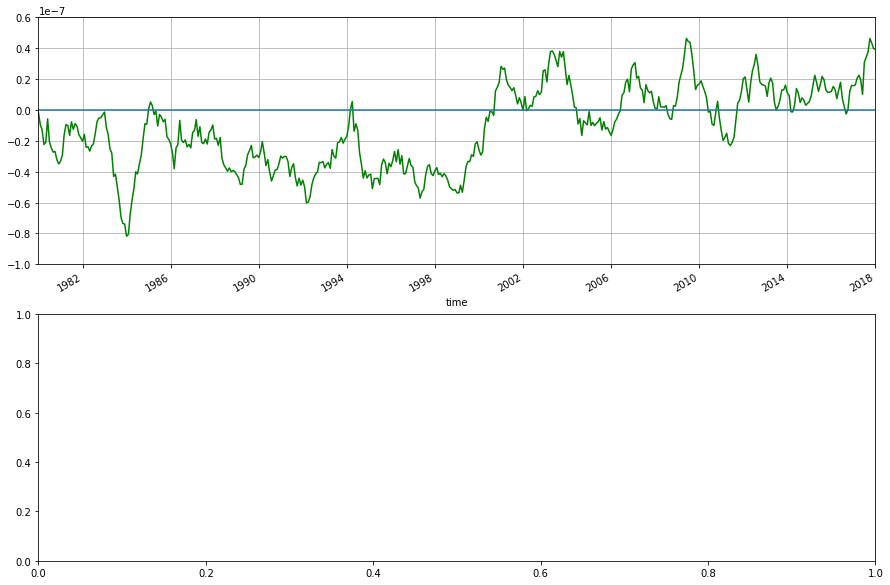

In [58]:
fig, ax = plt.subplots(nrows=2, figsize=(15,10))
curl_taux_roll_mean.sel(lat=slice(-70,-60), lon=slice(-30, 30)).mean(['lat','lon']).plot(ax=ax[0], color='g')
ax[0].grid()
ax[0].set_xlim('1980-01-01', '2018-01-01')
ax[0].set_ylim(ymin=-10*1e-8, ymax=6*1e-8)
ax[0].axhline(y=0);